In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('raw_data.csv')

# keep only the desired columns
df = df[['iso_code', 'location', 'date', 'total_cases', 'total_deaths', 'stringency_index', 'population', 'gdp_per_capita', 'human_development_index']]

# drop rows with missing values
df.dropna(inplace=True)

# convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# sort dataframe by location and date
df.sort_values(['location', 'date'], inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

# save preprocessed data to new file
df.to_csv('covid_impact_on_global_economy_preprocessed.csv', index=False)


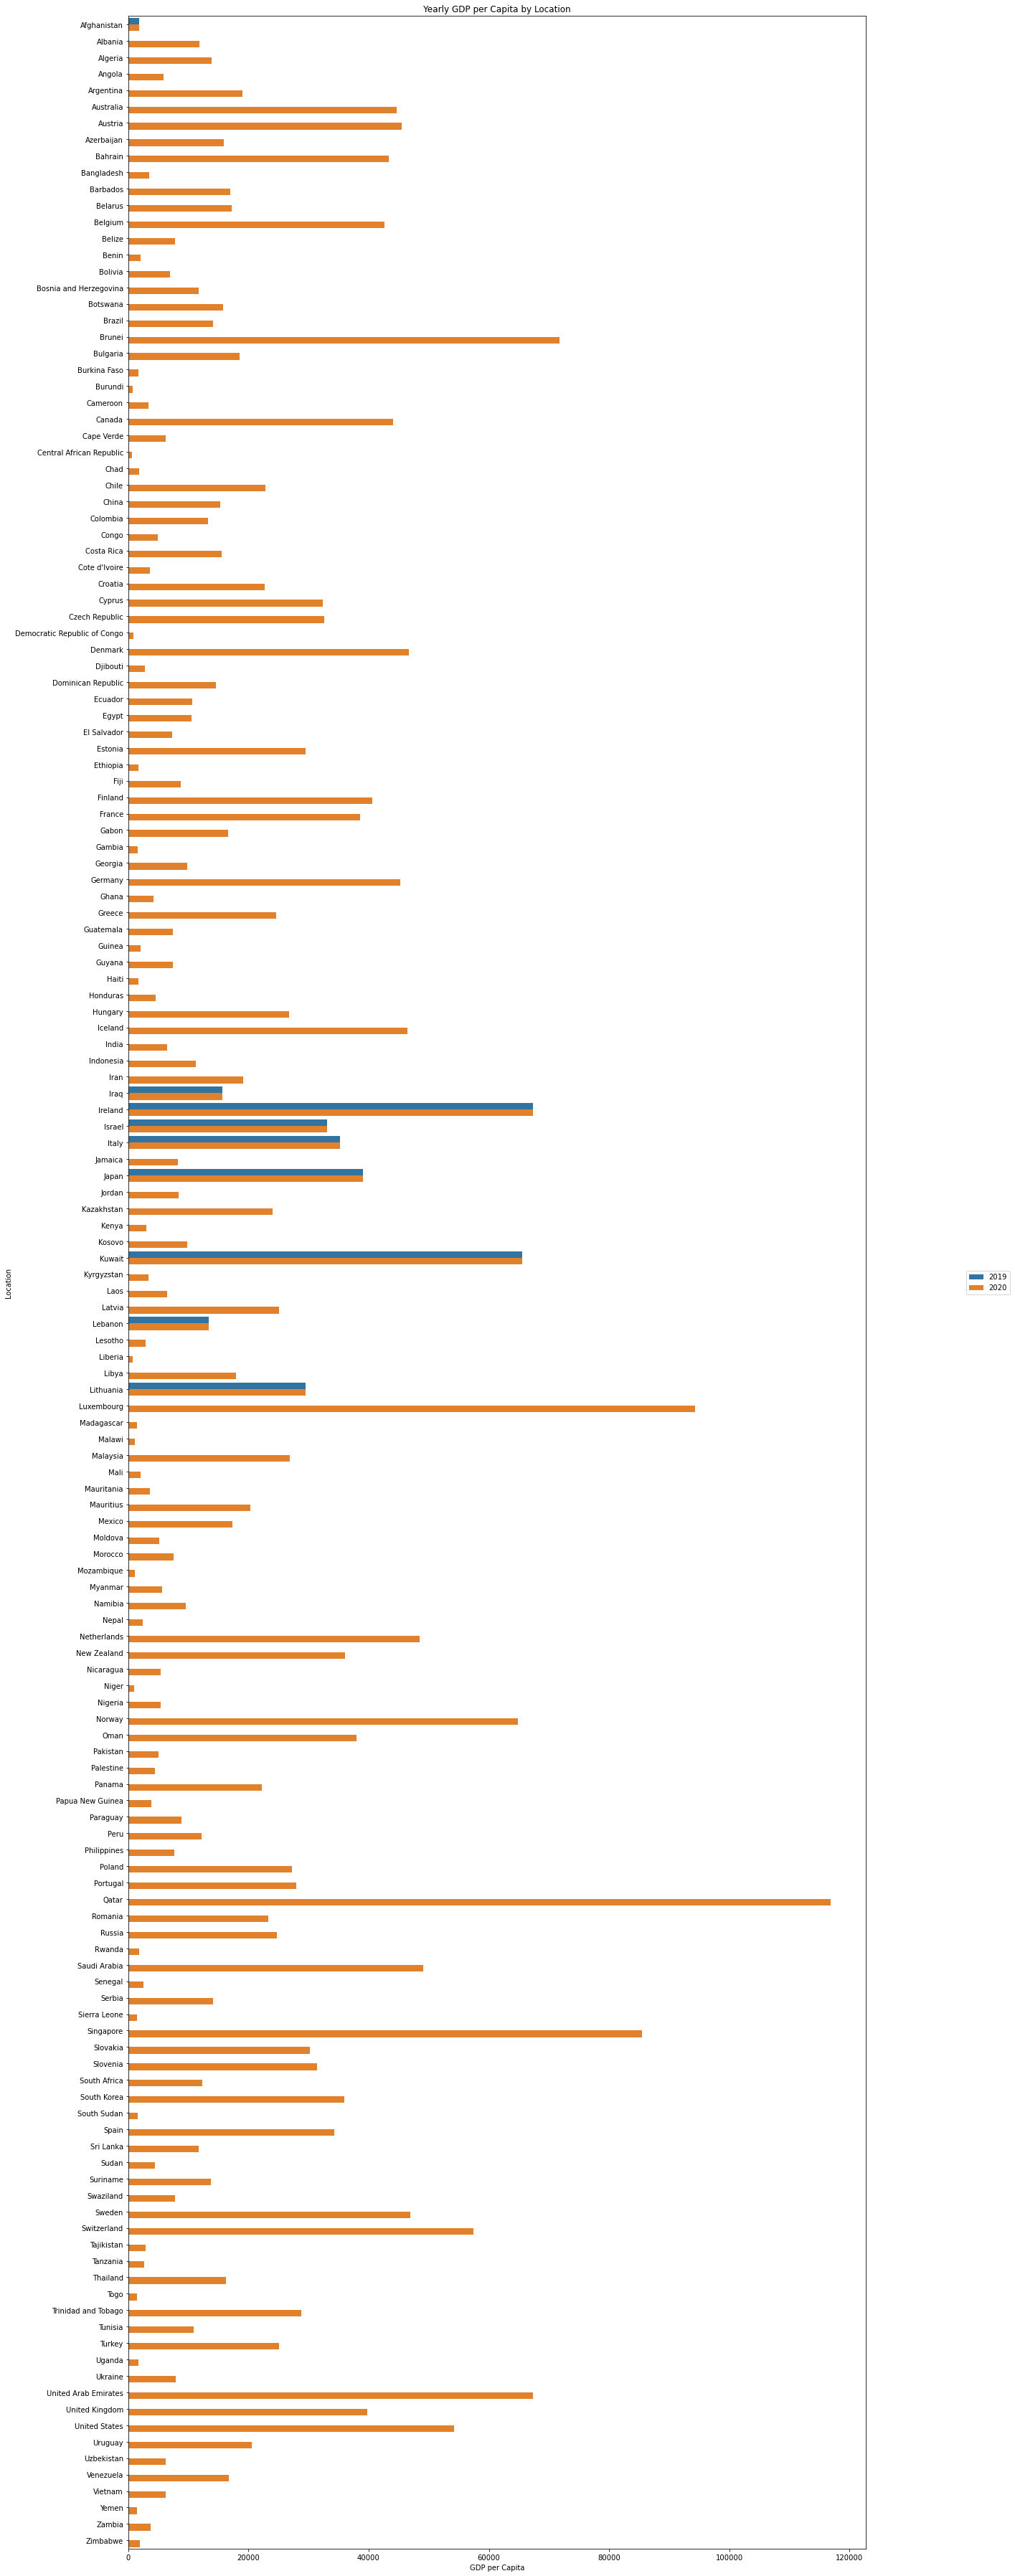

In [7]:
# create new column for year
df['year'] = df['date'].dt.year

# calculate yearly GDP for each location
df_yearly_gdp = df.groupby(['location', 'year']).agg({'gdp_per_capita': 'mean'}).reset_index()

# pivot dataframe for better visualization
df_pivot = df_yearly_gdp.pivot(index='location', columns='year', values='gdp_per_capita')

# plot horizontal bar chart
plt.figure(figsize=(20, 50))
plt.title('Yearly GDP per Capita by Location')
sns.barplot(data=df_yearly_gdp, y='location', x='gdp_per_capita', hue='year', orient='h')
plt.xlabel('GDP per Capita')
plt.ylabel('Location')
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.tight_layout()
plt.show()

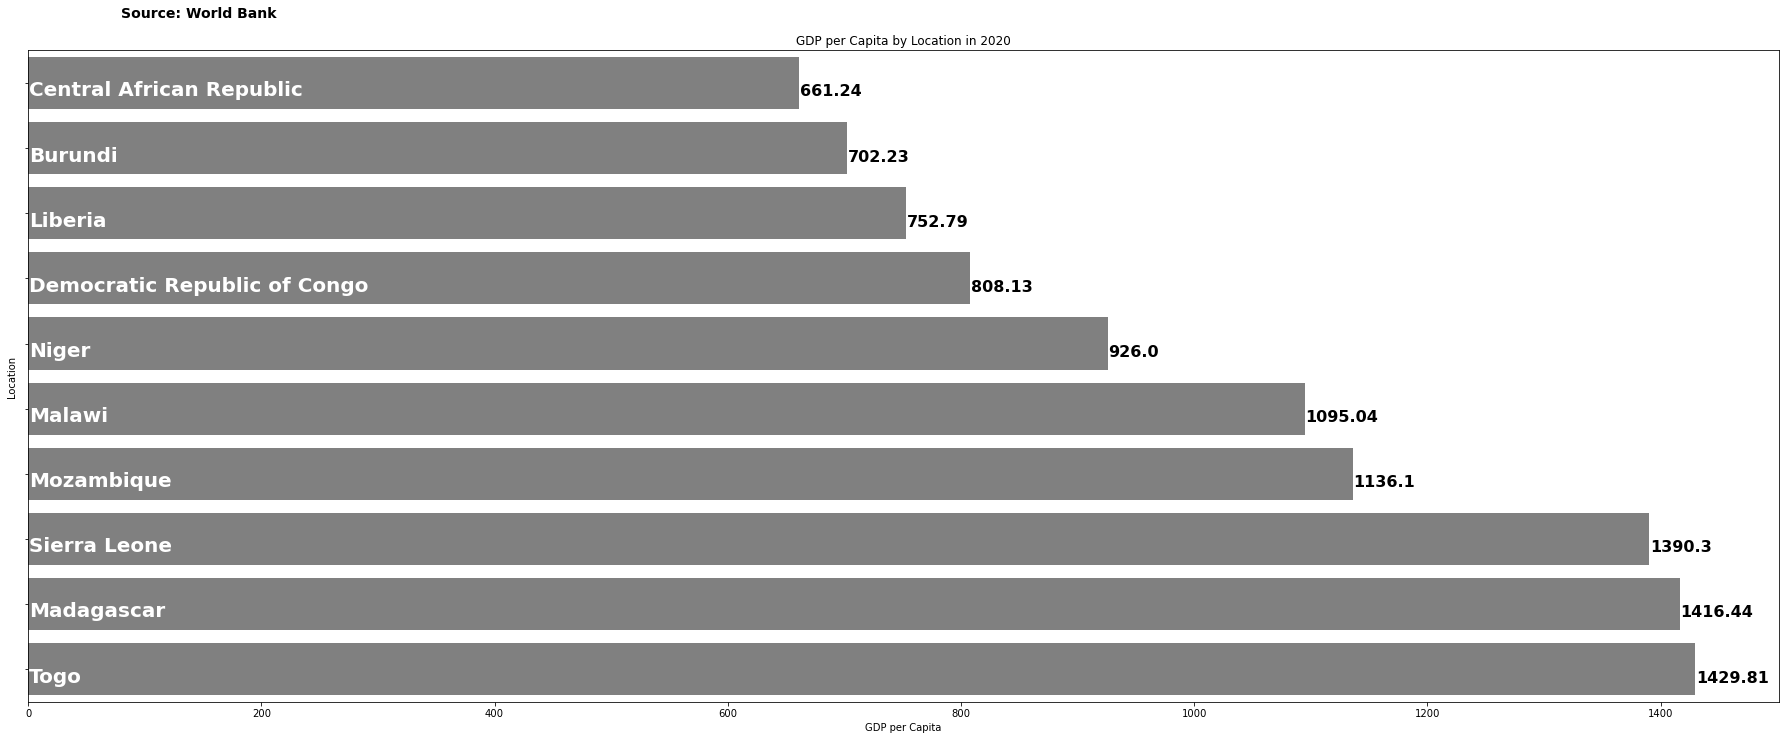

In [25]:
# create new column for year
df['year'] = df['date'].dt.year

# calculate yearly GDP for each location
df_yearly_gdp = df.groupby(['location', 'year']).agg({'gdp_per_capita': 'mean'}).reset_index()

# sort by GDP per capita in 2020
df_yearly_gdp_2020 = df_yearly_gdp[df_yearly_gdp['year'] == 2020].sort_values(by='gdp_per_capita', ascending=True)

# plot horizontal bar chart
plt.figure(figsize=(25 ,10))
plt.title('GDP per Capita by Location in 2020')

# set color for bars
color = 'grey'

# plot bars
ax = sns.barplot(data=df_yearly_gdp_2020.head(10), y='location', x='gdp_per_capita', color=color, orient='h')

# set x label
plt.xlabel('GDP per Capita')

# set y label
plt.ylabel('Location')

# add labels inside the bars
for i, v in enumerate(df_yearly_gdp_2020.head(10)['gdp_per_capita']):
    ax.text(v + 0.5, i + 0.2, str(round(v, 2)), color='black', fontweight='bold',fontsize=16)

# add labels above the bars
for i, v in enumerate(df_yearly_gdp_2020.head(10)['location']):
    ax.text(0.5, i + 0.2, str(v), color='white', fontweight='bold',fontsize=20)

# remove y axis tick labels
ax.set_yticklabels([])

plt.tight_layout()

# add source information
plt.text(80, -1, "Source: World Bank", fontweight='bold', fontsize=14)

plt.show()

# create a new data frame with the top 10 GDP locations in 2020
top_gdp_locations = df_yearly_gdp_2020.head(10)

# save the data frame to an Excel file
top_gdp_locations.to_excel('top_gdp_locations.xlsx', index=False)


AttributeError: 'BarContainer' object has no attribute 'get_width'

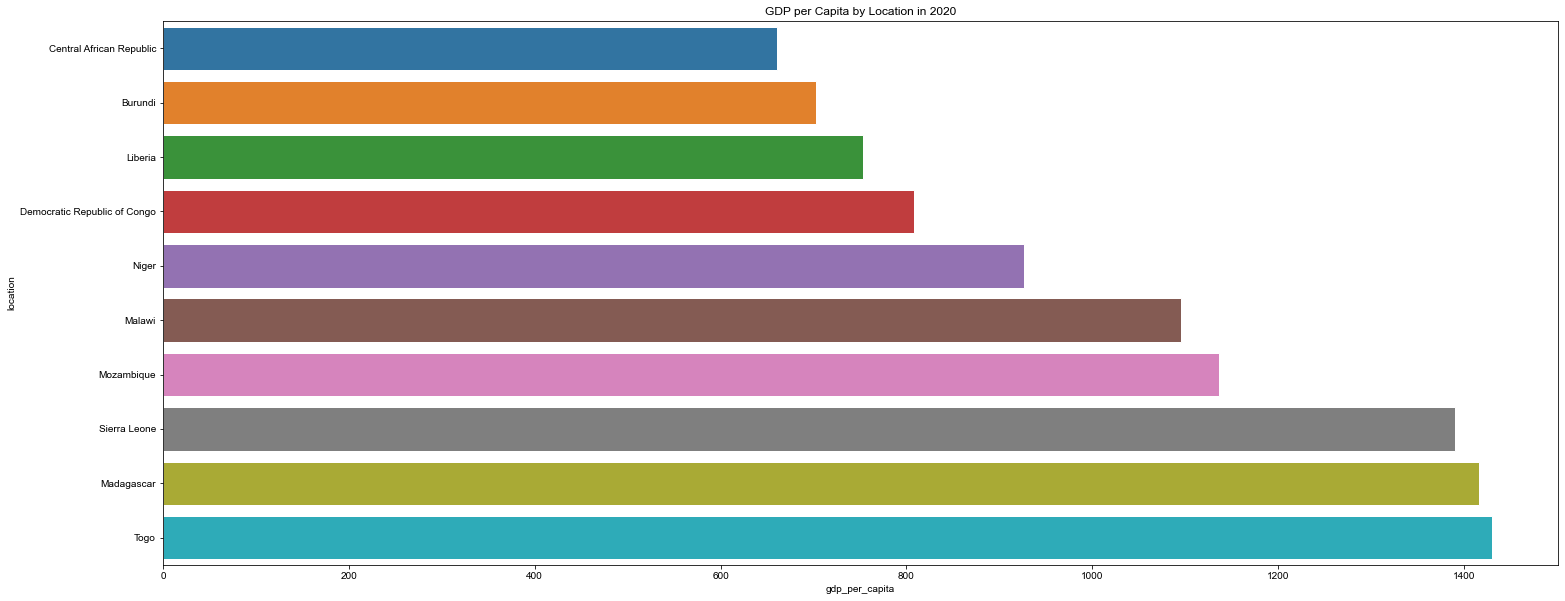

In [57]:
plt.figure(figsize=(25, 10))
plt.title('GDP per Capita by Location in 2020')
sns.set_style('whitegrid')
ax = sns.barplot(data=df_yearly_gdp_2020.head(10), y='location', x='gdp_per_capita', label='location', orient='h')

# Menambahkan label ke dalam batang
for i in ax.containers:
    ax.text(i.get_width(), i.get_y() + i.get_height() / 2, 
            f"{i.get_width():.2f}", fontsize=12, color='black', ha='left', va='center')

plt.xlabel('GDP per Capita')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'get_texts'

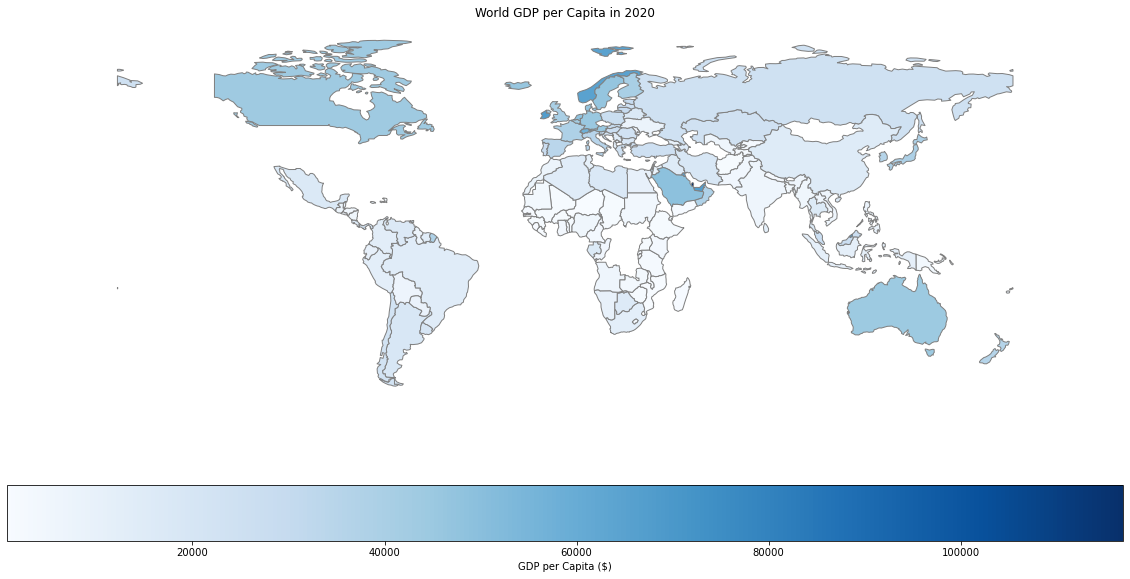

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# merge with GDP data
gdp_2020 = df_yearly_gdp[df_yearly_gdp['year'] == 2020]
world_gdp = world.merge(gdp_2020, how='left', left_on='name', right_on='location')

# plot map
fig, ax = plt.subplots(figsize=(20,10))
world_gdp.plot(column='gdp_per_capita',edgecolor=u'gray', cmap='Blues', ax=ax, legend=True, legend_kwds={'label': 'GDP per Capita ($)', 'orientation': 'horizontal'})
ax.set_title('World GDP per Capita in 2020')
ax.set_axis_off()

# get legend object
leg = ax.get_legend()

# set text color to white
for text in leg.get_texts():
    text.set_color('white')

# set label color to white
leg.get_title().set_color('white')

plt.show()
